### Concept of Bagging

- CART is a model which most of the time, suffers due to overfitting and hence results in high variance.
- In order to reduce the variance without making any compromise on bias, we can use ensemble methods.
- One of the techniques to do that is bagging(Bootstrap Aggregation)
- In bagging, we create several resamples from our original training sample, build models using each resample, then pass our test data into each model.
- The results from the models are aggregated. The aggregated output has less variance compared to the model fitted usuing our train sample.

+ We first fit a model with our training sample, find out the accuracy of that model on our test data. Then using our aggregated bootsrap sample model, we find the accuracy of the model

+ Let us see if our theory is valid and if it is, how much of a difference it makes

### For this project, we will use Titanic dataset from Kaggle. Using variables like gender, age, class of ticket and few other variables with a classification tree model, we predict if they survived or not

### Importing packages

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split

from sklearn.tree import DecisionTreeClassifier

from sklearn.tree import DecisionTreeRegressor

from sklearn.metrics import confusion_matrix

from scipy.stats import mode

D:\Anaconda\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


### Reading data

In [3]:
titanic = pd.read_csv("D:\\Praxis\\ML\\data\\titanic\\train.csv")

In [4]:
titanic.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

### Data dictionary


- Variable -	Definition	Key
- survival -	Survival	0 = No, 1 = Yes
- pclass -	  Ticket class	1 = 1st, 2 = 2nd, 3 = 3rd
- sex -	        Sex	
- Age -	      Age in years	
- sibsp -	  # of siblings / spouses aboard the Titanic	
- parch -	  # of parents / children aboard the Titanic	
- ticket -	  Ticket number	
- fare -	  Passenger fare	
- cabin -	  Cabin number	
- embarked -  Port of Embarkation	C = Cherbourg, Q = Queenstown, S = Southampton

In [5]:
X = titanic[['PassengerId','Pclass','Age', 'SibSp', 'Parch', 'Fare','Sex','Ticket','Cabin']]
y = titanic['Survived']

### Splitting data into train and test

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.3, stratify = y, random_state = 99)

### Looking at the data

In [8]:
X_train.shape

(623, 9)

In [9]:
X_train.columns

Index(['PassengerId', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'Sex',
       'Ticket', 'Cabin'],
      dtype='object')

In [10]:
X_train.sample(2)

,PassengerId,Pclass,Age,SibSp,Parch,Fare,Sex,Ticket,Cabin
507,508,1,NaN,0,0,26.550,male,111427,NaN
508,509,3,28.0,0,0,22.525,male,C 4001,NaN


In [11]:
X_train.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,623.000000,623.000000,493.000000,623.000000,623.000000,623.000000
mean,446.756019,2.279294,30.895700,0.512039,0.377207,33.686676
std,255.123036,0.853782,14.392504,1.090488,0.827925,50.331918
min,4.000000,1.000000,0.750000,0.000000,0.000000,0.000000
25%,224.000000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,453.000000,3.000000,29.000000,0.000000,0.000000,15.245800
75%,663.500000,3.000000,39.000000,1.000000,0.000000,34.375000
max,891.000000,3.000000,80.000000,8.000000,6.000000,512.329200


### Univariate Analysis

### Survived

In [12]:
y_train

443    1
431    1
623    0
37     0
330    1
      ..
214    0
297    0
581    1
323    1
400    1
Name: Survived, Length: 623, dtype: int64

### Passenger class

In [13]:
X_train['Pclass'].value_counts()

#145 passengers belong to 1st class
#136 passengers belong to 2nd class
#342 passengers belong to 3rd class

3    338
1    164
2    121
Name: Pclass, dtype: int64

### Passenger age

In [14]:
sum(X_train['Age'].isnull())

# 117 null values in age. Lets look at the distribution of age to decide what to use to impute missing values

130

In [15]:
X_train_without_null_age_values = X_train[X_train['Age'].notnull()]

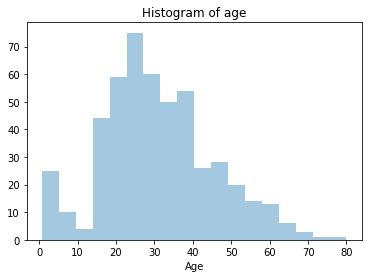

In [16]:
sns.distplot((X_train_without_null_age_values['Age']), kde=False)
plt.title('Histogram of age')
plt.show();

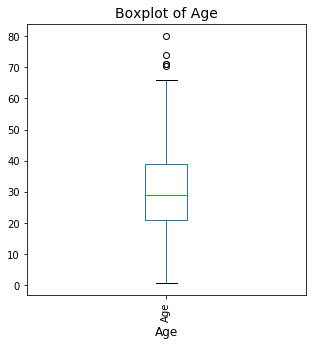

In [17]:
#The rotation argument
#Side by Side boxplot
X_train_without_null_age_values.boxplot(column="Age",
             grid=False,         
             figsize = (5,5),
             rot=90)            #The angle by which you want to rotate the labels

plt.xlabel("Age", fontsize=12)
plt.title("Boxplot of Age", fontsize=14)

plt.show()


In [18]:
X_train_without_null_age_values.Age.describe()

count    493.000000
mean      30.895700
std       14.392504
min        0.750000
25%       21.000000
50%       29.000000
75%       39.000000
max       80.000000
Name: Age, dtype: float64

#### After looking at the histogram and boxplot, mean and median are very close to each other. Distribution is not very skewed with a few outliers. So mean is used to impute missing values

In [19]:
X_train.loc[X_train.Age.isnull(), 'Age'] = np.mean(X_train_without_null_age_values.Age)

D:\Anaconda\lib\site-packages\pandas\core\indexing.py:966: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


In [20]:
X_train.Age.describe()

count    623.000000
mean      30.895700
std       12.800405
min        0.750000
25%       24.000000
50%       30.895700
75%       36.000000
max       80.000000
Name: Age, dtype: float64

### Number of siblings/ spouse brought on board

In [21]:
X_train.SibSp.value_counts()

# Most of the passengers have no siblings or spouse on the ship. Some have 1. Very few have more than that. 

0    427
1    145
2     23
4     13
3      7
8      5
5      3
Name: SibSp, dtype: int64

### Number of parents/ children brought on board

In [22]:
X_train.Parch.value_counts()

# Most of the passengers haven't brought their parent or children on board. Some of them have brought 1/2

0    478
1     82
2     51
5      5
3      4
4      2
6      1
Name: Parch, dtype: int64

### Fare

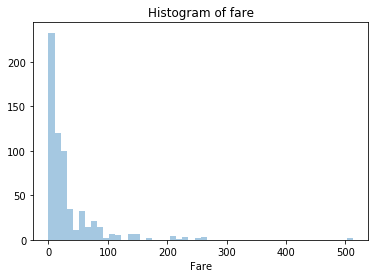

In [23]:
sns.distplot((X_train['Fare']), kde=False)
plt.title('Histogram of fare')
plt.show();

### most of the people seem to have paid no fare, meaning they got their ticket for free

### Sex

In [24]:
X_train.Sex.value_counts()

# 65% of the passengers were male and 35% were female

male      411
female    212
Name: Sex, dtype: int64

In [25]:
X_train.loc[X_train.Sex == 'male', 'Sex_int'] = 1
X_train.loc[X_train.Sex == 'female', 'Sex_int'] = 0

D:\Anaconda\lib\site-packages\pandas\core\indexing.py:845: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = _infer_fill_value(value)


In [26]:
X_train.Sex_int.value_counts()

1.0    411
0.0    212
Name: Sex_int, dtype: int64

### Pre processing done on test data

In [27]:
X_test_without_null_age_values = X_test[X_test['Age'].notnull()]
X_test.loc[X_test.Age.isnull(), 'Age'] = np.mean(X_test_without_null_age_values.Age)

X_test.loc[X_test.Sex == 'male', 'Sex_int'] = 1
X_test.loc[X_test.Sex == 'female', 'Sex_int'] = 0

### Creating X and y

In [28]:
X_train = X_train[['Pclass','Age', 'SibSp', 'Parch', 'Fare','Sex_int']]
#y_train = titanic['Survived']

X_test = X_test[['Pclass','Age', 'SibSp', 'Parch', 'Fare','Sex_int']]
#y_test = titanic_test['Survived']

### Fitting decision tree model

In [30]:
clf_gini = DecisionTreeClassifier(criterion = "gini", random_state = 100)
clf_gini.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=100, splitter='best')

In [31]:
y_pred = clf_gini.predict(X_test)
y_pred

array([1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1,
       0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1,
       0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1,
       0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1,
       1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0,
       0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0,
       0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1,
       0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1,
       1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1,
       0, 0, 0, 1], dtype=int64)

### Visualising our tree

In [32]:
import sklearn.tree as tree
import pydotplus
from sklearn.externals.six import StringIO 
from IPython.display import Image

D:\Anaconda\lib\site-packages\sklearn\externals\six.py:31: DeprecationWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", DeprecationWarning)


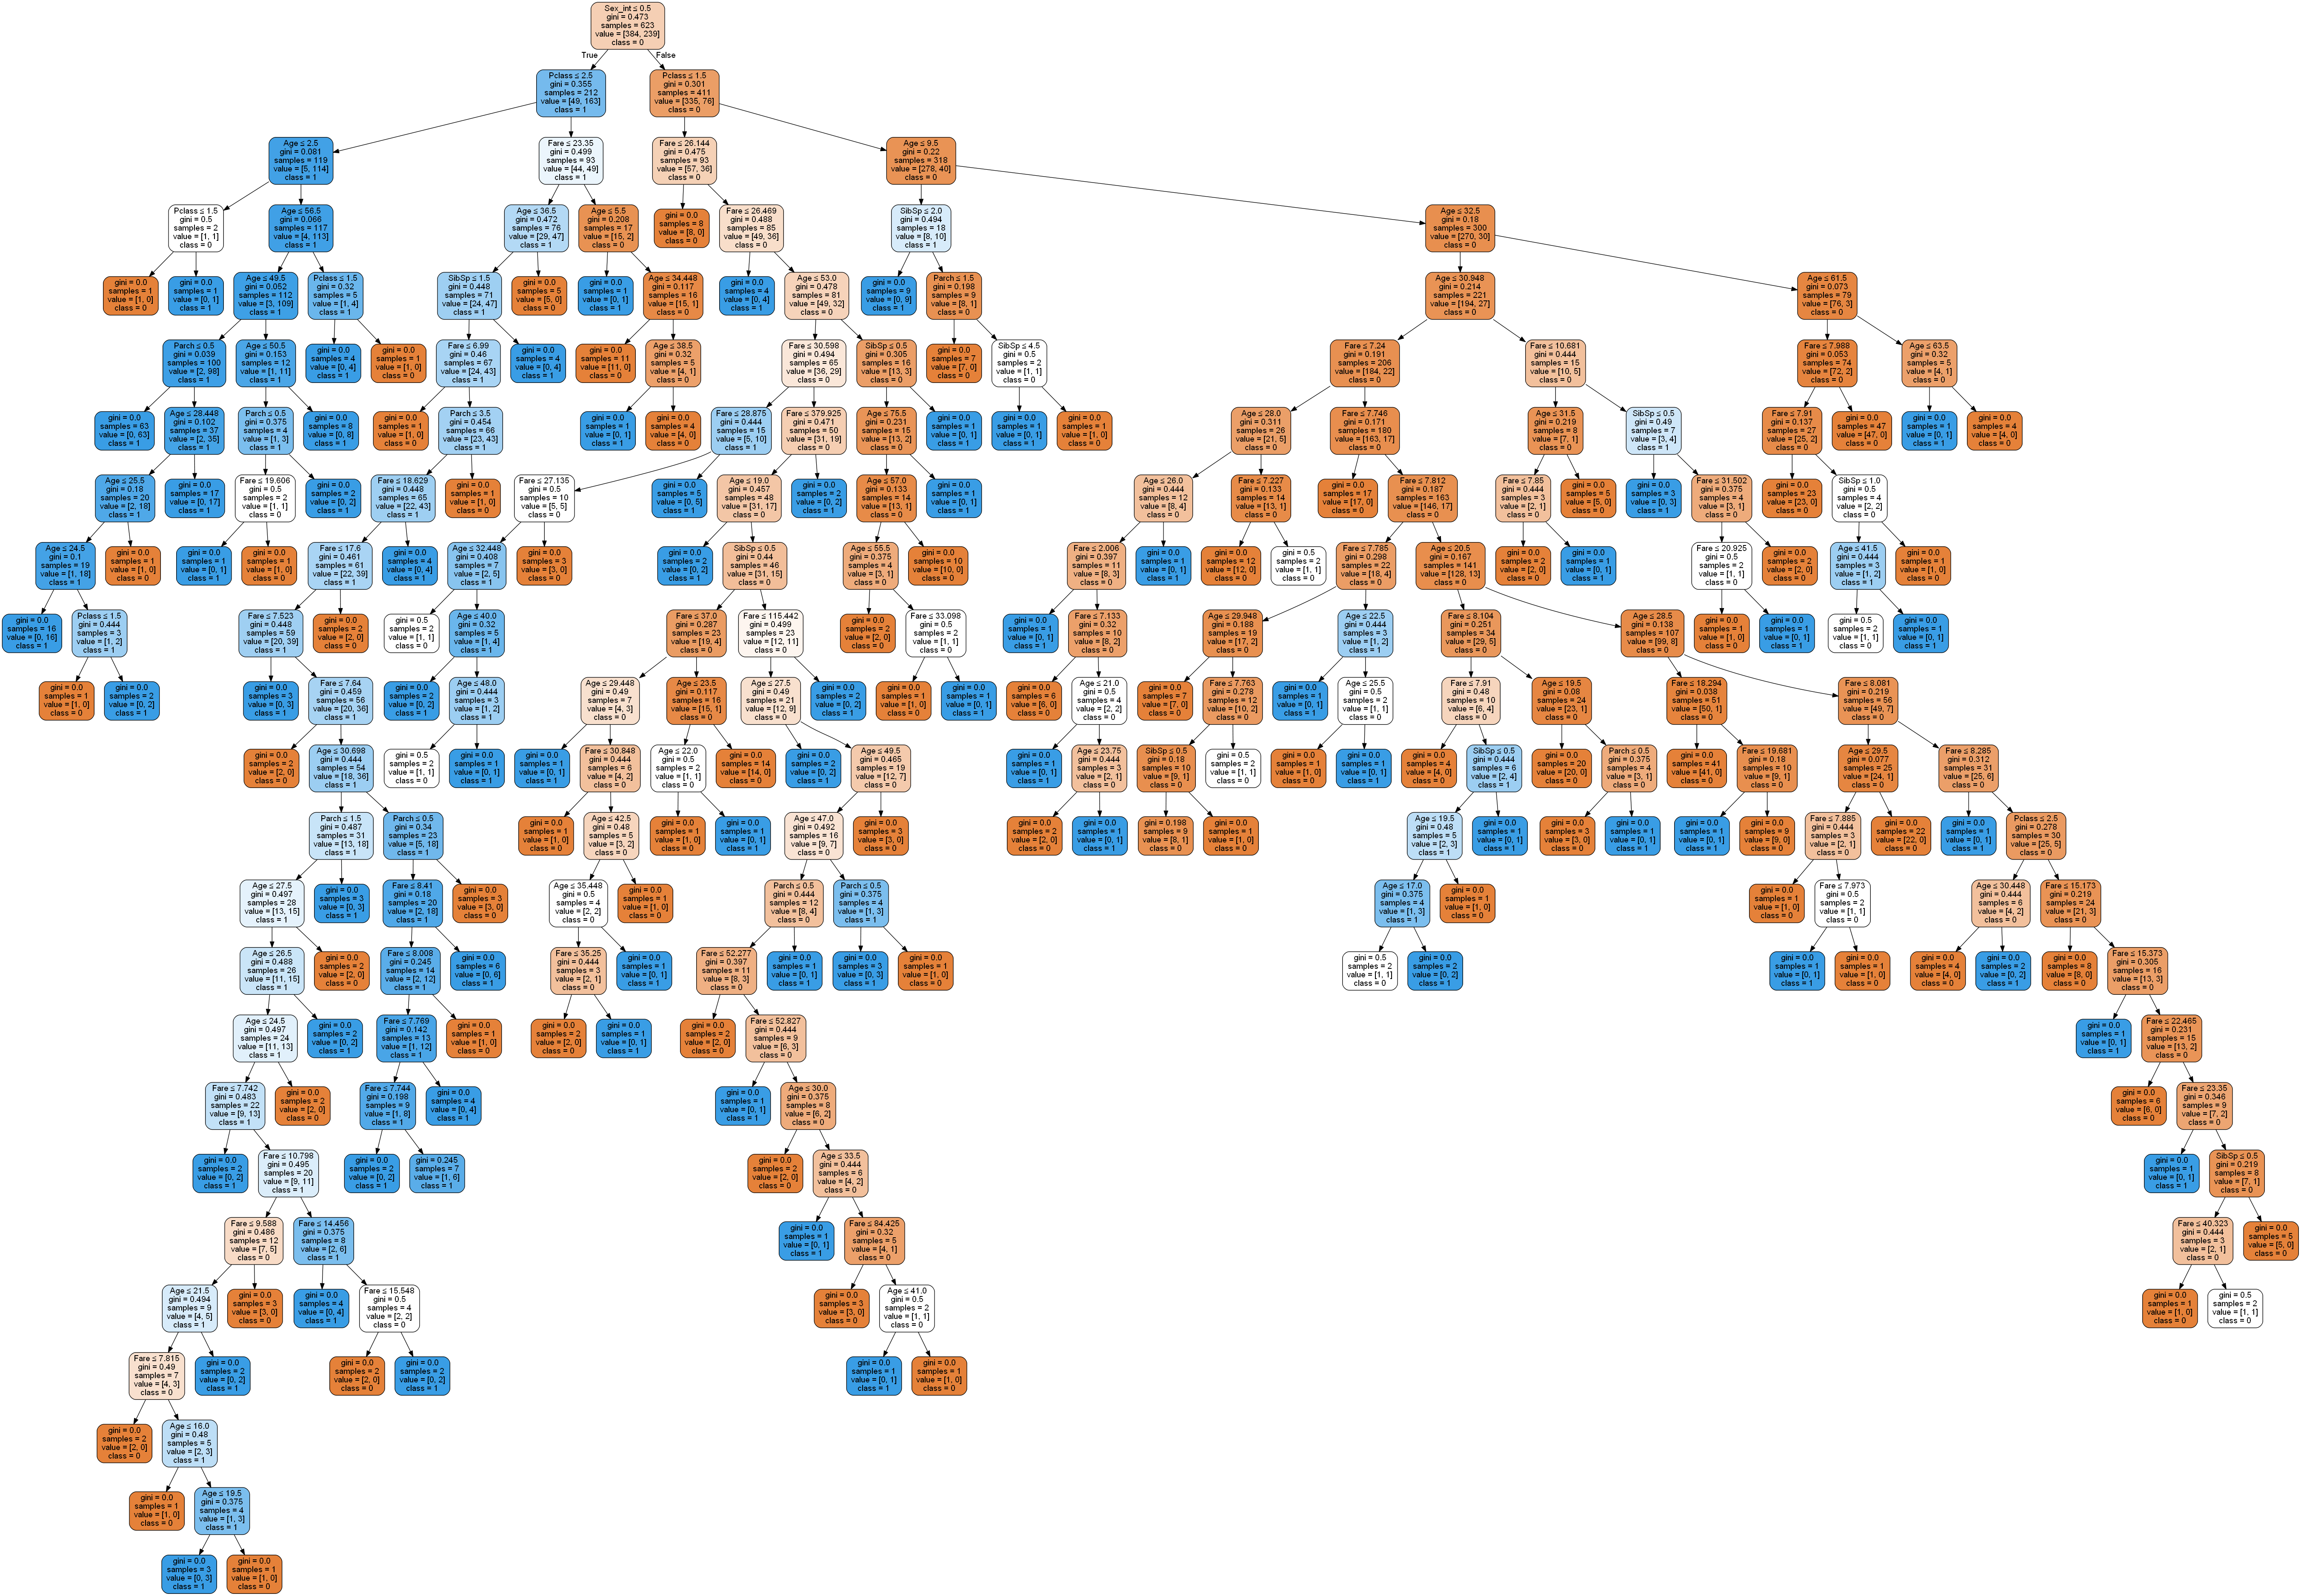

In [33]:
dot_data = StringIO()
tree.export_graphviz(clf_gini, 
 out_file=dot_data, 
 class_names=['0','1'],# the target names.
 feature_names=['Pclass','Age', 'SibSp', 'Parch', 'Fare','Sex_int'], # the feature names.
 filled=True, # Whether to fill in the boxes with colours.
 rounded=True, # Whether to round the corners of the boxes.
 special_characters=True)
 
graph = pydotplus.graph_from_dot_data(dot_data.getvalue()) 
Image(graph.create_png())

In [34]:
c = confusion_matrix(y_test,y_pred)

In [35]:
c

array([[118,  47],
       [ 29,  74]], dtype=int64)

In [36]:
overall_accuracy = 1
correct_preds = 0
for i in range(0,2):
    for j in range(0,2):
        if (i == j):
            correct_preds = correct_preds + c[i][j]
overall_accuracy = correct_preds / np.sum(c)
print("Overall accuracy is {}".format(overall_accuracy))

Overall accuracy is 0.7164179104477612


Our overall accuracy when using a normal train test split is 0.71

### Let's see if we can improve that using the prinicple of bagging - bootstrap aggregation.

In [37]:
### Combining X_train and y_train, so that they can be split into several bootstrap samples

X = X_train
y = y_train
X['Survived'] = y
train = X

In [39]:
train.shape[0]

623

In [58]:
k = 200

In [59]:
bootstrap_samples = []
bootstrap_sample_X = []
bootstrap_sample_y = []
for i in range(0,k):
    bootstrap_samples.append(train.sample(train.shape[0], replace = True))
    bootstrap_sample_X.append(bootstrap_samples[i][['Pclass','Age', 'SibSp', 'Parch', 'Fare','Sex_int']])
    bootstrap_sample_y.append(bootstrap_samples[i][['Survived']])

### Fitting decision tree model with bootstrap samples

In [60]:
y_pred = []
clf_gini = []
for i in range(0,k):
    clf_gini.append(DecisionTreeClassifier(criterion = "gini", random_state = 100))
    clf_gini[i].fit(bootstrap_sample_X[i], bootstrap_sample_y[i])
    y_pred.append(clf_gini[i].predict(X_test))    

### Finding the aggregate measure, in this case, mode

In [61]:
modes_list = []
for i in range(0, len(y_pred[0])):
    ith_obs_list = []
    for j in range(0,len(y_pred)):
        ith_obs_list.append(y_pred[j][i])
    #print(ith_obs_list)
    modes_list.append(mode(ith_obs_list)[0][0])

In [62]:
len(y_test)

268

In [63]:
len(modes_list)

268

In [64]:
bootstrap_c = confusion_matrix(y_test,modes_list)

In [65]:
bootstrap_c

array([[140,  25],
       [ 25,  78]], dtype=int64)

In [66]:
overall_accuracy = 1
correct_preds = 0
for i in range(0,2):
    for j in range(0,2):
        if (i == j):
            correct_preds = correct_preds + bootstrap_c[i][j]
overall_accuracy = correct_preds / np.sum(bootstrap_c)
print("Overall accuracy is {}".format(overall_accuracy))

Overall accuracy is 0.8134328358208955


### Our overall accuracy after using bagging has increased from 0.71 to 0.81, a 10% increase